### Pyplot interface

pyplot is better for rough work and quick checks, better to use Object Oriented Approach

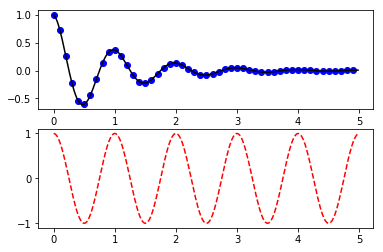

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)
t1 = np.arange(0.0,5.0,0.1)
t2 = np.arange(0.0,5.0,0.02)
plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

### Hierarchy in matplotlib
Matplotlib has a hierarchical structure consisting of something often called fig and ax. Actually these three components are special Artists called "containers" (and there is the fourth container Tick) which we will see later.This hierarchy makes simple examples above even clearer.

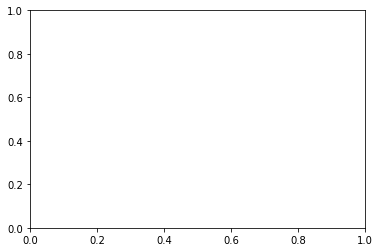

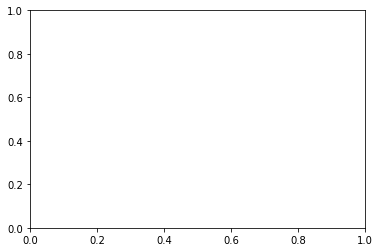

In [2]:
#example 1
fig, ax = plt.subplots()
# make Figure and Axes which belongs to 'fig'

#example 2
fig = plt.figure()
#make figure
ax = fig.add_subplot(1,1,1)
#make Axes belonging to fig

Taking a further look at attributes of fig and ax helps you understand the hierarchy more 

fig.axes: [<matplotlib.axes._subplots.AxesSubplot object at 0x1205c8390>]
ax.figure: Figure(432x288)
ax.xaxis: XAxis(54.000000,36.000000)
ax.yaxis: YAxis(54.000000,36.000000)
ax.xaxis.axes: AxesSubplot(0.125,0.125;0.775x0.755)
ax.yaxis.axes: AxesSubplot(0.125,0.125;0.775x0.755)
ax.xaxis.figure: Figure(432x288)
ax.yaxis.figure: Figure(432x288)


AttributeError: 'Figure' object has no attribute 'xaxis'

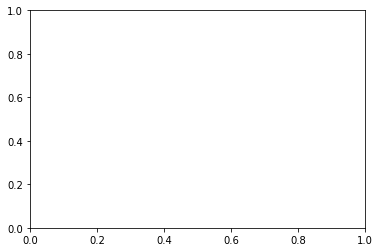

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #make a blank plotting area
print("fig.axes:", fig.axes)
print("ax.figure:", ax.figure)
print("ax.xaxis:", ax.xaxis)
print("ax.yaxis:", ax.yaxis)
print("ax.xaxis.axes:", ax.xaxis.axes)
print("ax.yaxis.axes:", ax.yaxis.axes)
print("ax.xaxis.figure:", ax.xaxis.figure)
print("ax.yaxis.figure:", ax.yaxis.figure)
print("fig.xaxis:", fig.xaxis)

From the above results, we can expect following rules about the hierarchy of Figure, Axes, and Axis.
1. Figure knows Axes but not Axis
2. Axes knows Figure and Axis both
3. Axis knows Axes and Figure both
4. Figure can belong to only single Figure because ax.figure is not a list
5. Axes can have one XAxis and YAxis respectively for similar reason
6. XAxis and YAxis can belong to single Axes and, accordingly, single Figure

### Everything in your plot is an Artist 

https://matplotlib.org/tutorials/introductory/usage.html

ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x120c93ef0>, <matplotlib.lines.Line2D object at 0x120c6f630>]
line1:  Line2D(1st plot)
line2:  Line2D(2nd Plot)


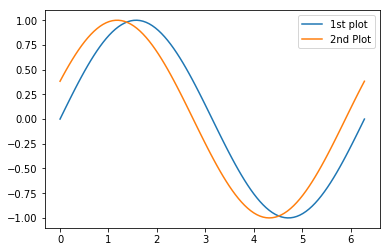

In [11]:
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
print("ax.lines before plot:\n", ax.lines) #empty list

#add Line2D in ax.lines
line1, = ax.plot(x, np.sin(x), label = "1st plot")
print("ax.lines after 1st plot:\n", ax.lines)

#add another Line2D
line2, = ax.plot(x, np.sin(x+np.pi/8), label = "2nd Plot")
print("ax.lines after 2nd plot:\n", ax.lines)

ax.legend()
print("line1: ", line1)
print("line2: ", line2)

### fig.legend and ax.legend 

fig.legends is a "box" for legends added by fig.legend method. You may think "What's that for? We have ax.legend." The difference is a scope of each method. While ax.legend only collects labels from Artists belonging to ax, fig.legend only collects labels from all Axes under fig. This is useful, for instance, when you make a plot using ax.twinx. Simply using ax.legend twice makes two legends, which is not desirable in general. 

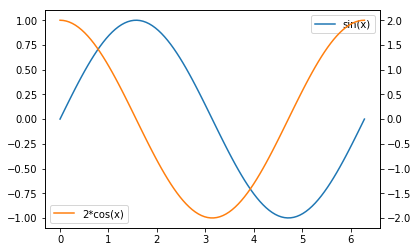

In [15]:
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), label = 'sin(x)')
ax1 = ax.twinx()
ax1.plot(x, 2*np.cos(x), c = 'C1', label = '2*cos(x)')
#cf. 'CN' notation
#https://matplotlib.org/tutorials/colors/colors.html#cn-color-selection
ax.legend()
ax1.legend()

A famous recepie to put them together is to combine legend handlers and labels of both Axes

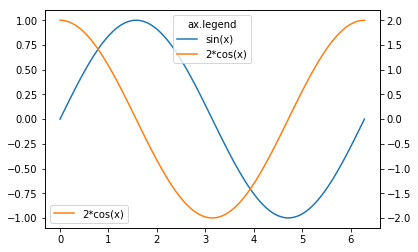

In [18]:
#Executing this part in a different notebook cell shows an updated figure updated figure
handler, label = ax.get_legend_handles_labels()
handler1, label1 = ax1.get_legend_handles_labels()
ax.legend(handler + handler1, label+label1, loc = 'upper center', title = 'ax.legend')
# Legend made by ax1.legend remains
fig

This can be easily done by fig.legend without arguments which was introduced in ver 2.1. By default, the position is specified with Figure coordinate which is not useful when you want to put it in a plotting frame. You can change it to Axes coordinate with bbox_transform keyword.

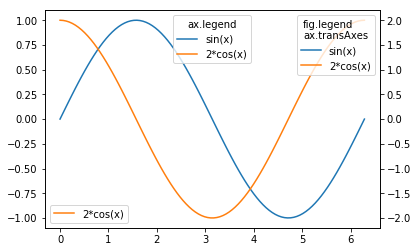

In [19]:
fig.legend(loc = 'upper right', bbox_to_anchor=(1,1), bbox_transform = ax.transAxes, title = 'fig.legend\nax.transAxes')
fig